In [1]:
import pandas as pd
import numpy as np

In [2]:
insdata=pd.read_csv(r"C:\Users\Admin\Desktop\Python\Stats November\insurance.csv")

In [3]:
insdata.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insdata['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [5]:
insdata['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [6]:
insdata['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [7]:
insdata['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [8]:
insdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


The value at 25% is first quartile, 50% is second quartile and 75% is third quartile

In [10]:
insdata.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [11]:
insdata.shape

(1338, 7)

In [12]:
insdata.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values in the data set Insurance

In [14]:
import seaborn as sns

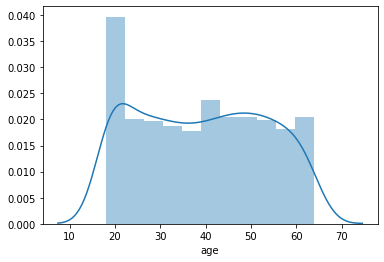

In [15]:
sns.distplot(insdata["age"],kde=True)

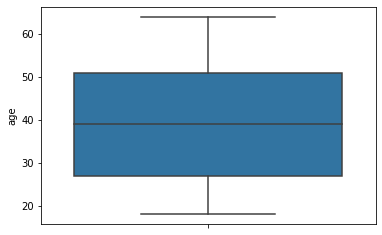

In [16]:
sns.boxplot(y=insdata["age"])

From the above box plot we can see the distribution of age. As seen in box plot, there are no outliers as such visible.

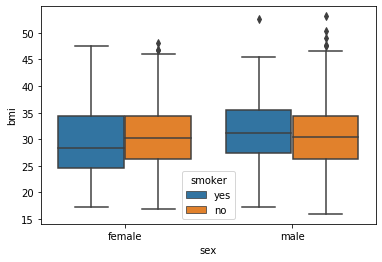

In [18]:
sns.boxplot(y=insdata["bmi"],x=insdata["sex"],hue=insdata["smoker"])

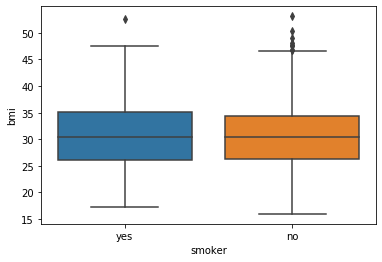

In [19]:
sns.boxplot(y=insdata["bmi"],x=insdata["smoker"])

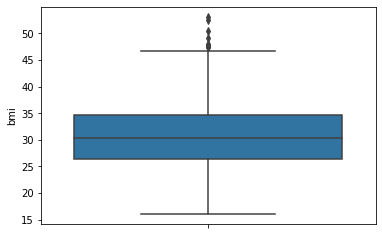

In [20]:
sns.boxplot(y=insdata["bmi"])

As seen in above box plot, the column bmi has outliers.

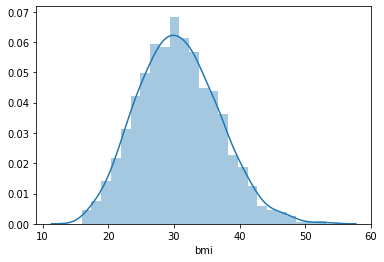

In [22]:
sns.distplot(insdata["bmi"],kde=True)

BMI is normaly distributed

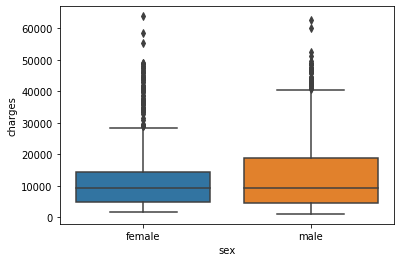

In [24]:
sns.boxplot(y=insdata["charges"],x=insdata["sex"])

As seen above, male have high charges compared to female. The above comparison also has outliers.

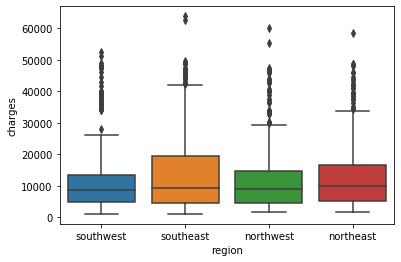

In [26]:
sns.boxplot(y=insdata["charges"],x=insdata["region"])

When we analyze charge with respect to region, we can see data has outliers. 

However we can also say that in southeast region medical cost charges in higher.

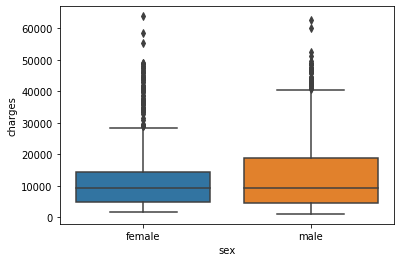

In [28]:
sns.boxplot(y=insdata["charges"],x=insdata["sex"])

As seen above, when sex is compared to medical charges, male have higher medical cost charges compared to female.
The above comparison also has outliers.

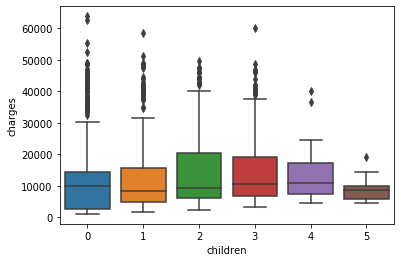

In [30]:
sns.boxplot(y=insdata["charges"],x=insdata["children"])

People with two children is having higher medical costs. The boxplot is right skewed for 1,2,3 and 4 children cases.

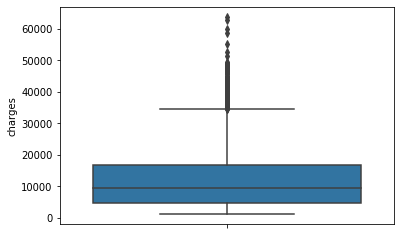

In [32]:
sns.boxplot(y=insdata["charges"])

As seen in the above boxplot, the column charges has high amout of outliers. The data is slightly righ skewed.

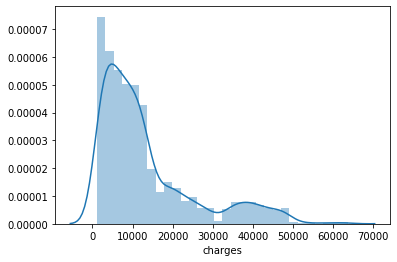

In [34]:
sns.distplot(insdata["charges"],kde=True)

As seen in above distribution, there is maximum number of medical charges in range of 0 to 30000.

Now let us check the distribution of categorical variable

In [37]:
insdata.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [38]:
insdata["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

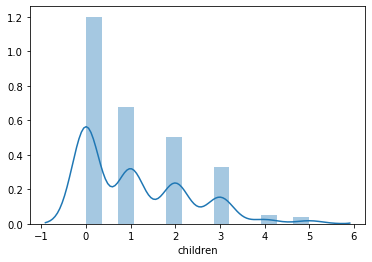

In [39]:
sns.distplot(insdata["children"],kde=True)

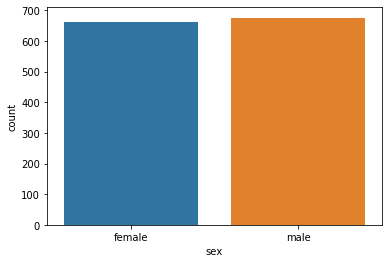

In [40]:
sns.countplot(x=insdata["sex"])

In [41]:
insdata["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

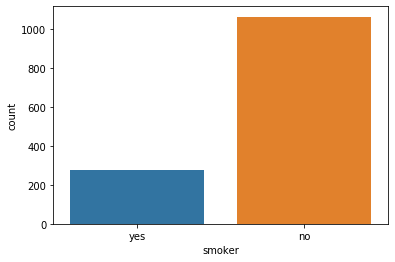

In [42]:
sns.countplot(x=insdata["smoker"])

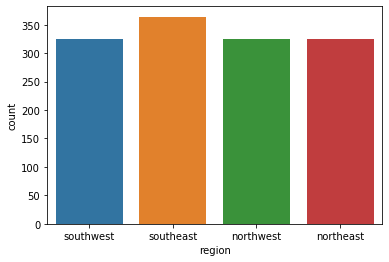

In [43]:
sns.countplot(x=insdata["region"])

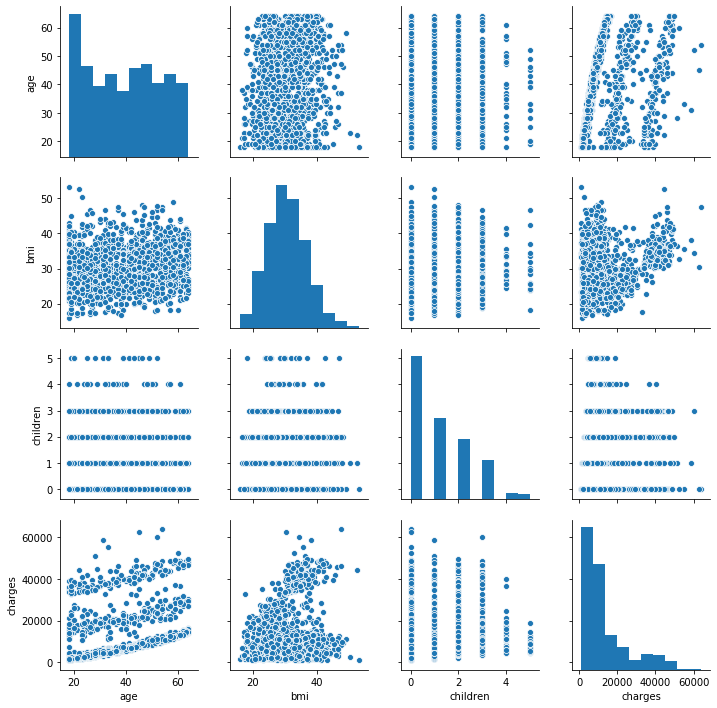

In [44]:
sns.pairplot(data=insdata)

From above pairplot, we can see the districution of charges,bmi and age column as well.

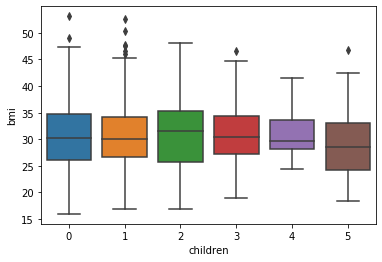

In [46]:
sns.boxplot(y=insdata["bmi"],x=insdata["children"])

In [47]:
insdata.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Non of the numerical columns show any correlation

--------------------------------------------------------

Assuming null hypothesis that the mean of charges for both smokers and non-smokers is same.
Assuming p-value as 0.05.

In [50]:
insdata_2=insdata[insdata["smoker"]=='yes']["charges"]

In [51]:
insdata_2.count()

274

In [52]:
insdata_3=insdata[insdata["smoker"]=='no']["charges"]

In [53]:
insdata_3.count()

1064

In [54]:
from scipy import stats

In [55]:
stats.ttest_ind(insdata_2,insdata_3)

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)

As P-Value for charges for smoker and non-smoker is less than 0.05, null hypothesis assumed is false.

Alternate hypothesis is True.

This proves the charges for non-smokers and smokers differ significantly.

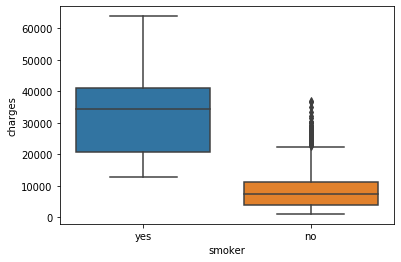

In [57]:
sns.boxplot(y=insdata["charges"],x=insdata["smoker"])

In [58]:
#Smoking is injurious to health can be inferred from above result. 
#Non-smokers has substantially lower medical cost charges as the values at first,second and third quartile is lower compared to smokers even though non-smokers has outliers.

In [59]:
#Assuming null hypothesis that the mean of bmi for both male and female is same.
#Assuming p-value as 0.05.

In [60]:
insdata_4=insdata[insdata["sex"]=='male']["bmi"]
insdata_5=insdata[insdata["sex"]=='female']["bmi"]

In [61]:
insdata_4.count()

676

In [62]:
insdata_5.count()

662

In [63]:
stats.ttest_ind(insdata_4,insdata_5)

Ttest_indResult(statistic=1.696752635752224, pvalue=0.08997637178984932)

As P-Value for bmi for male and female is more than 0.05, null hypothesis assumed is true.
This proves the charges for non-smokers and smokers are similar.

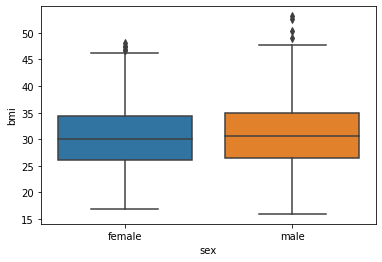

In [65]:
sns.boxplot(y=insdata["bmi"],x=insdata["sex"])

From the above box plot we can say the median of bmi of male and female is also more or less same.
Hence BMI of male does not differ significantly from females.

Smokers in male and females

In [68]:
insdata_5=insdata[insdata["sex"]=='male']["smoker"]
insdata_6=insdata[insdata["sex"]=='female']["smoker"]

In [69]:
insdata_5.value_counts()

no     517
yes    159
Name: smoker, dtype: int64

In [70]:
insdata_6.value_counts()

no     547
yes    115
Name: smoker, dtype: int64

In [71]:
insdata["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

Count of male and Female differ by a small margin.

In [73]:
#In Male Proportion of smokers
print(159/676)

0.23520710059171598


In [74]:
#In Female Proportion of smokers
print(115/662)

0.17371601208459214


When we compare the above two ratios, the percentage of smokers in male is higher than percentage of smokers in females.

In [76]:
insdata_7=insdata[insdata["sex"]=='female'][["bmi","children"]]

In [77]:
insdata_7.head(5)

,bmi,children
0,27.90,0
5,25.74,0
6,33.44,1
7,27.74,3
9,25.84,0


In [84]:
insdata_7.count()

bmi         662
children    662
dtype: int64

In [78]:
insdata_7["children"].value_counts()

0    289
1    158
2    119
3     77
4     11
5      8
Name: children, dtype: int64

In [79]:
insdata_7.count()

bmi         662
children    662
dtype: int64

In [95]:
insdata_8=insdata_7[insdata_7["children"]==0][["bmi"]]

In [96]:
insdata_8.count()

bmi    289
dtype: int64

In [97]:
insdata_8.head(5)

,bmi
0,27.90
5,25.74
9,25.84
11,26.29
13,39.82


In [98]:
insdata_9=insdata_7[insdata_7["children"]==1][["bmi"]]

In [99]:
insdata_9.count()

bmi    158
dtype: int64

In [100]:
insdata_9.head(5)

,bmi
6,33.44
16,30.78
21,32.40
23,31.92
58,22.88


In [101]:
insdata_10=insdata_7[insdata_7["children"]==2][["bmi"]]

In [102]:
insdata_10.head(5)

,bmi
27,32.775
41,36.630
43,30.800
46,38.665
51,33.630


In [103]:
insdata_10.count()

bmi    119
dtype: int64

Defining null and alternate hypothesis as well as p value.

Null hypothesis is that the numnber of children has no effect on bmi. 

Alternante hypothesis is that number of children has an effect on bmi".

P-value is equal to 0.05.

In [104]:
f_stat, p_value = stats.f_oneway(insdata_8,insdata_9,insdata_10)

In [105]:
print(p_value)

[0.71585799]


In [106]:
print(f_stat)

[0.33447201]


Since P-value is greater than 0.05. Null Hypothesis is true.
Hence the number of children has no effect on BMI.